In [1]:
import numpy as np
import pandas as pd
from main_knapsack_functions import *
from logreg_functions import *

In [2]:
dfs_mconstr = []
instance_offset = 0

for num_constr in range(2, 6):
    df_m = build_training_set(
        num_instances=2000,
        num_items=None,
        instance_generator=generate_knapsack_mconstraint,
        m=num_constr
    )

    # make instance_id globally unique
    df_m = df_m.copy()
    df_m["instance_id"] += instance_offset

    instance_offset = df_m["instance_id"].max() + 1
    dfs_mconstr.append(df_m)

training_mconstr = pd.concat(dfs_mconstr, ignore_index=True)
training_mconstr


/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/0-1 Knapsack/main_knapsack_functions.py:452: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(all_dfs, ignore_index=True)
/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/0-1 Knapsack/main_knapsack_functions.py:452: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(all_dfs, ignore_index=True)
/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/0-1 Knapsack/main_knapsack_functions.py:452: 

,node_id,parent_id,depth,visit_idx,open_nodes_count,branch_parent_var,branch_parent_dir,branch_parent_value,lp_objective,num_frac,...,x1,x2,x3,x4,x5,instance_id,num_items,m_constraints,x6,x7
0,0,NaN,0,0,0,NaN,None,NaN,127.329268,2.0,...,NaN,NaN,NaN,NaN,NaN,0,6,2,NaN,NaN
1,2,0.0,1,1,1,5.0,up,0.589431,127.186047,2.0,...,NaN,NaN,NaN,NaN,1.0,0,6,2,NaN,NaN
2,4,2.0,2,2,2,3.0,up,0.530233,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,0,6,2,NaN,NaN
3,3,2.0,2,3,1,3.0,down,0.530233,125.925926,2.0,...,NaN,NaN,0.0,NaN,1.0,0,6,2,NaN,NaN
4,6,3.0,3,4,2,4.0,up,0.703704,91.000000,0.0,...,NaN,NaN,0.0,1.0,1.0,0,6,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216799,17,1.0,2,20,0,1.0,down,0.076923,115.235294,1.0,...,0.0,NaN,NaN,NaN,NaN,7999,6,5,NaN,NaN
216800,22,17.0,3,21,1,2.0,up,0.058824,100.473684,1.0,...,0.0,1.0,NaN,NaN,NaN,7999,6,5,NaN,NaN
216801,24,22.0,4,22,2,4.0,up,0.157895,NaN,NaN,...,0.0,1.0,NaN,1.0,NaN,7999,6,5,NaN,NaN
216802,23,22.0,4,23,1,4.0,down,0.157895,94.000000,0.0,...,0.0,1.0,NaN,0.0,NaN,7999,6,5,NaN,NaN


In [3]:
clf, metrics, data = train_logreg(training_mconstr)
print(metrics)

[node] missing cols dropped (13): ['slack', 'num_fixed', 'num_fixed_1', 'num_fixed_0', 'fix_ratio', 'total_weight_fixed_1', 'total_value_fixed_1', 'frac_var_index', 'frac_var_normalized', 'frac_var_weight', 'frac_var_value', 'frac_var_ratio', 'frac_var_fraction']
[path] missing cols dropped (2): ['branch_parent_weight', 'branch_parent_ratio']
[global] missing cols dropped (4): ['incumbent_val', 'has_incumbent', 'node_gap', 'node_rel_gap']
Final X shape: (216804, 7)
Numeric cols: ['depth', 'lp_objective', 'branch_parent_var', 'branch_parent_value', 'visit_idx', 'open_nodes_count']
Categorical cols: ['branch_parent_dir']
{'roc_auc': 0.9188393804592947, 'accuracy': 0.8336789328711585, 'f1': 0.6431606905710492}


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encou

In [4]:
X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]

coef_df = inspect_logreg_coefficients(clf, X_train)

                  feature      coef
0  branch_parent_dir_None  3.953234
1    branch_parent_dir_up -2.234624
2        open_nodes_count -1.750128
3  branch_parent_dir_down -1.291423
4            lp_objective  0.483372
5                   depth -0.335043
6     branch_parent_value -0.326591
7               visit_idx -0.244069
8       branch_parent_var -0.041803


In [5]:
probs, preds = prediction_distribution(clf, X_test)

Proportion predicted 1: 0.28569217913404105


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


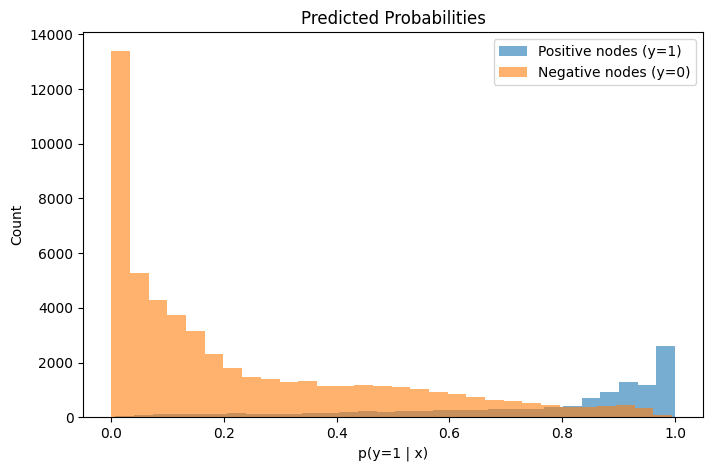

In [6]:
import matplotlib.pyplot as plt

def plot_probability_histogram(probs, y_test):
    plt.figure(figsize=(8,5))
    plt.hist(probs[y_test==1], bins=30, alpha=0.6, label="Positive nodes (y=1)")
    plt.hist(probs[y_test==0], bins=30, alpha=0.6, label="Negative nodes (y=0)")
    plt.legend()
    plt.title("Predicted Probabilities")
    plt.xlabel("p(y=1 | x)")
    plt.ylabel("Count")
    plt.show()

plot_probability_histogram(probs, y_test)

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(cm)


[[44188  8776]
 [ 1972  9686]]


In [8]:
training_mconstr.to_csv("/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/training_mconstr.csv", index=False)